In [94]:
#import libraries 

import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [95]:
#retreive data NP-separated samples - isotopes and relative abundance
fn = '../data/20250121_kkeller_gc_irms_data_corrected.xlsx'
df = pd.read_excel(fn, sheet_name='NP_separated_iso')

#split dataframe into sample and gdgt
def split_sample_id(df):
    df[['sample', 'gdgt']] = df['sample_id'].str.split('_', expand=True)
    return df
df = split_sample_id(df)

#evaluate new df
df.head


<bound method NDFrame.head of    sample_id    biphytane  distance_from_plume  corrected_d2H.permil  \
0    S1_Cren         BP-0                 20.0           -190.052727   
1    S1_Cren         BP-1                 20.0                   NaN   
2    S1_Cren         BP-2                 20.0           -302.365450   
3    S1_Cren  BP-3 (Cren)                 20.0           -283.796786   
4      S1_G0         BP-0                 20.0           -302.067513   
..       ...          ...                  ...                   ...   
66     S9_G3         BP-1                  0.0           -220.679613   
67     S9_G3         BP-2                  0.0           -218.570424   
68     S9_G3  BP-3 (Cren)                  0.0                   NaN   
69       NaN          NaN                  NaN                   NaN   
70       NaN          NaN                  NaN                   NaN   

    corrected_d2H_sem.permil   d13C        BP0 sample  gdgt  
0                   5.766330 -22.70        

In [96]:
#NP separated relative abundancas
fn_1 = '../data/Keller_GC_FID.xlsx'
df_sep_rel_abund = pd.read_excel(fn_1)
df_sep_rel_abund = split_sample_id(df_sep_rel_abund)
df_sep_rel_abund.head()

,sample_id,GDGT,distance,biphytane,rel_abundance,sample,gdgt
0,S1_Cren,Cren,20,BP-0,0.022269,S1,Cren
1,S1_Cren,Cren,20,BP-2,0.505841,S1,Cren
2,S1_Cren,Cren,20,BP-3 (Cren),0.471890,S1,Cren
3,S1_G0,G0,20,BP-0,1.000000,S1,G0
4,S1_G2,G2,20,BP-0,0.283976,S1,G2


In [97]:
#bulk isotopes
fn2 = '../data/../data/20250121_kkeller_gc_irms_data_corrected.xlsx'
df_bulk_isotopes = pd.read_excel(fn2, sheet_name='bulk_iso')
#split dataframe into sample and gdgt
def split_sample_id(df):
    df[['location', 'sample']] = df_bulk_isotopes['sample_id'].str.split('_', expand=True)
    return df
df_bulk_isotopes = split_sample_id(df_bulk_isotopes)
df_bulk_isotopes.head()


,sample_id,compound,corrected_d2H.permil,corrected_d2H_sem.permil,location,sample
0,AC_S10,BP-0,-289.584340,4.096167,AC,S10
1,AC_S10,BP-1,-235.003246,4.064346,AC,S10
2,AC_S10,BP-2,-250.893685,4.232279,AC,S10
3,AC_S10,BP-3 (Cren),-305.688579,4.496946,AC,S10
4,AC_S10,BP-4,NaN,NaN,AC,S10


In [98]:
#bulk relative abundances
fn3 = '../data/AC_relative_abundance_bulk.xlsx'
df_bulk_abund = pd.read_excel(fn3)
df_bulk_abund.head(4)


,fid_nr,sample_id_inj_vol,sample,peak_nr,biphytane,rt.min,Area 2 (Vs),rel_abundance_irms,rel_abundance_fid
0,BF18576,AC_S4_manual_chex_10ul.dxf,S4,37,BP-0,1190.0,38.416,0.553521,0.551724
1,NaN,NaN,S4,38,BP-1,1218.3,10.884,0.156823,0.155172
2,NaN,NaN,S4,39,BP-2,1250.0,12.070,0.173912,0.181034
3,NaN,NaN,S4,40,BP-3 (Cren),1270.3,8.033,0.115744,0.112069


## Re-ordering data

In [99]:
sample_order = ['S1', 'S4', 'S5', 'S7', 'S9','S10','S11']
bp_order = ['BP-0','BP-1','BP-2','BP-3 (Cren)','BP-4']
gdgt_order= ['G0','G1','G2','G3','Cren']

In [100]:
#order NP-separated isotope data
df['sample'] = pd.Categorical(df['sample'], categories=sample_order, ordered=True)
df['biphytane'] = pd.Categorical(df['biphytane'], categories=bp_order, ordered=True)
df['gdgt'] = pd.Categorical(df['gdgt'], categories=gdgt_order, ordered=True)

#order NP-separated relative abundance data
df_sep_rel_abund['sample'] = pd.Categorical(df_sep_rel_abund['sample'], categories=sample_order, ordered=True)
df_sep_rel_abund['biphytane'] = pd.Categorical(df_sep_rel_abund['biphytane'], categories=bp_order, ordered=True)
df_sep_rel_abund['gdgt'] = pd.Categorical(df_sep_rel_abund['GDGT'], categories=gdgt_order, ordered=True)

In [101]:
#order bulk isotope data
sample_order_bulk = ['S4', 'S5', 'S7', 'S9','S10','S11']
df_bulk_abund['sample'] =  pd.Categorical(df_bulk_abund['sample'], categories=sample_order_bulk, ordered=True)
df_bulk_abund['biphytane'] = pd.Categorical(df_bulk_abund['biphytane'], categories=bp_order, ordered=True)
df_bulk_isotopes['sample'] =  pd.Categorical(df_bulk_isotopes['sample'], categories=sample_order_bulk, ordered=True)
df_bulk_isotopes['biphytane'] = pd.Categorical(df_bulk_isotopes['compound'], categories=bp_order, ordered=True)

In [102]:
# Sort by 'Sample' in the specified order
df = df.sort_values(by=['sample','biphytane'])
df_bulk_abund = df_bulk_abund.sort_values(by=['sample','biphytane'])
df_bulk_isotopes = df_bulk_isotopes.sort_values(by=['sample', 'biphytane'])
df_sep_rel_abund = df_sep_rel_abund.sort_values(by =['sample','biphytane'])

## Descriptive Statistics

In [104]:
# Calculate the mean `d2H_weighted_mean.permil` per `compound` for each `sample_id`
df.groupby(['gdgt', 'biphytane'], as_index=False)['corrected_d2H.permil'].mean()

# 


/var/folders/13/217c9md10ldcbnl1vbd8_hnr0000gn/T/ipykernel_33866/4131611600.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['gdgt', 'biphytane'], as_index=False)['corrected_d2H.permil'].mean()


,gdgt,biphytane,corrected_d2H.permil
0,G0,BP-0,-306.892129
1,G0,BP-1,NaN
2,G0,BP-2,NaN
3,G0,BP-3 (Cren),NaN
4,G0,BP-4,NaN
5,G1,BP-0,-254.863004
6,G1,BP-1,-228.469000
7,G1,BP-2,NaN
8,G1,BP-3 (Cren),NaN
9,G1,BP-4,NaN


In [105]:
# Calculate the mean `d2H_weighted_mean.permil` per `compound` for each `sample_id`

df.groupby(['gdgt'], as_index=False)['corrected_d2H.permil'].max()



/var/folders/13/217c9md10ldcbnl1vbd8_hnr0000gn/T/ipykernel_33866/552382191.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['gdgt'], as_index=False)['corrected_d2H.permil'].max()


,gdgt,corrected_d2H.permil
0,G0,-278.438865
1,G1,-222.048787
2,G2,-198.549425
3,G3,-212.716739
4,Cren,-54.135648


In [106]:
df.groupby(['gdgt'], as_index=False)['corrected_d2H.permil'].min()

/var/folders/13/217c9md10ldcbnl1vbd8_hnr0000gn/T/ipykernel_33866/3402160376.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['gdgt'], as_index=False)['corrected_d2H.permil'].min()


,gdgt,corrected_d2H.permil
0,G0,-326.730342
1,G1,-263.098011
2,G2,-255.131159
3,G3,-288.155266
4,Cren,-304.549891


In [107]:
df.groupby(['gdgt', 'biphytane'], as_index=False)['corrected_d2H.permil'].max().dropna()

/var/folders/13/217c9md10ldcbnl1vbd8_hnr0000gn/T/ipykernel_33866/2171371765.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['gdgt', 'biphytane'], as_index=False)['corrected_d2H.permil'].max().dropna()


,gdgt,biphytane,corrected_d2H.permil
0,G0,BP-0,-278.438865
5,G1,BP-0,-244.633337
6,G1,BP-1,-222.048787
10,G2,BP-0,-198.549425
11,G2,BP-1,-210.275526
12,G2,BP-2,-215.319218
15,G3,BP-0,-273.124225
16,G3,BP-1,-212.716739
17,G3,BP-2,-216.386540
20,Cren,BP-0,-146.220478


In [108]:
df.groupby(['gdgt', 'biphytane'], as_index=False)['corrected_d2H.permil'].min().dropna()

/var/folders/13/217c9md10ldcbnl1vbd8_hnr0000gn/T/ipykernel_33866/1280669876.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['gdgt', 'biphytane'], as_index=False)['corrected_d2H.permil'].min().dropna()


,gdgt,biphytane,corrected_d2H.permil
0,G0,BP-0,-326.730342
5,G1,BP-0,-263.098011
6,G1,BP-1,-233.621481
10,G2,BP-0,-255.131159
11,G2,BP-1,-230.908126
12,G2,BP-2,-224.926999
15,G3,BP-0,-288.155266
16,G3,BP-1,-220.679613
17,G3,BP-2,-218.570424
20,Cren,BP-0,-190.052727


In [109]:
df_bulk_isotopes.groupby(['biphytane'], as_index=False)['corrected_d2H.permil'].mean()

/var/folders/13/217c9md10ldcbnl1vbd8_hnr0000gn/T/ipykernel_33866/2100639531.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_bulk_isotopes.groupby(['biphytane'], as_index=False)['corrected_d2H.permil'].mean()


,biphytane,corrected_d2H.permil
0,BP-0,-289.990310
1,BP-1,-239.846360
2,BP-2,-261.707550
3,BP-3 (Cren),-304.573057
4,BP-4,NaN


## Color schemes and markers

In [110]:
#color scheme
unique_bps = df['biphytane'].unique()

# Define specific colors for each biphytane
bp_colors = {
    'BP-0': 'firebrick',  # Blue
    'BP-2': 'peru',  # Orange
    'BP-4': 'wheat',  # Green
    'BP-3 (Cren)': 'teal' ,  # Red
    'BP-1': 'mediumturquoise'   # Red
}


# Dictionary to specify marker styles for each biphytane
bp_markers = {
    'BP-0': 'o',
    'BP-1': '^',
    'BP-2': 's',
    'BP-3 (Cren)': 'P',
    'BP-4': '*'
}

# Map colors to GDGT categories
df['color'] = df['biphytane'].map(bp_colors)
df['style'] = df['biphytane'].map(bp_style)
df_sep_rel_abund['color'] = df['biphytane'].map(bp_colors)
df_sep_rel_abund['style'] = df['biphytane'].map(bp_colors)
# df.head()


In [111]:


# Define the desired order for GDGTs
gdgt_order = [ 'G0', 'G1', 'G2', 'G3','Cren']

# Convert the 'gdgt' column to a categorical type with the specified order
df['gdgt'] = pd.Categorical(df['gdgt'], categories=gdgt_order, ordered=True)
df_sep_rel_abund['gdgt'] = pd.Categorical(df_sep_rel_abund['gdgt'], categories=gdgt_order, ordered=True)

# Recreate unique_gdgts based on the ordered categories
unique_gdgts = df['gdgt'].cat.categories
print(unique_gdgts)


Index(['G0', 'G1', 'G2', 'G3', 'Cren'], dtype='object')


In [117]:
df.head()

,sample_id,biphytane,distance_from_plume,corrected_d2H.permil,corrected_d2H_sem.permil,d13C,BP0,sample,gdgt,color,style
0,S1_Cren,BP-0,20.0,-190.052727,5.76633,-22.70,NaN,S1,Cren,firebrick,D
4,S1_G0,BP-0,20.0,-302.067513,5.76633,-30.91,NaN,S1,G0,firebrick,D
6,S1_G2,BP-0,20.0,-198.549425,5.76633,-83.71,NaN,S1,G2,firebrick,D
1,S1_Cren,BP-1,20.0,NaN,NaN,-22.70,NaN,S1,Cren,mediumturquoise,s
5,S1_G0,BP-1,20.0,NaN,NaN,-83.71,NaN,S1,G0,mediumturquoise,s


In [118]:
df_sep_rel_abund.head()

,sample_id,GDGT,distance,biphytane,rel_abundance,sample,gdgt,color,style
0,S1_Cren,Cren,20,BP-0,0.022269,S1,Cren,firebrick,firebrick
3,S1_G0,G0,20,BP-0,1.000000,S1,G0,teal,teal
4,S1_G2,G2,20,BP-0,0.283976,S1,G2,firebrick,firebrick
5,S1_G2,G2,20,BP-1,0.496789,S1,G2,mediumturquoise,mediumturquoise
1,S1_Cren,Cren,20,BP-2,0.505841,S1,Cren,mediumturquoise,mediumturquoise


In [115]:
df_bulk_abund.head()

,fid_nr,sample_id_inj_vol,sample,peak_nr,biphytane,rt.min,Area 2 (Vs),rel_abundance_irms,rel_abundance_fid
0,BF18576,AC_S4_manual_chex_10ul.dxf,S4,37,BP-0,1190.0,38.416,0.553521,0.551724
1,NaN,NaN,S4,38,BP-1,1218.3,10.884,0.156823,0.155172
2,NaN,NaN,S4,39,BP-2,1250.0,12.070,0.173912,0.181034
3,NaN,NaN,S4,40,BP-3 (Cren),1270.3,8.033,0.115744,0.112069
16,BF18641,AC_S5_rep2_biphytanes_152uL.dxf,S5,18,BP-0,1188.6,24.137,0.579701,0.594867


## Figures

/var/folders/13/217c9md10ldcbnl1vbd8_hnr0000gn/T/ipykernel_33866/3273075706.py:76: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout(rect=[0, 0, 1, 0.9])


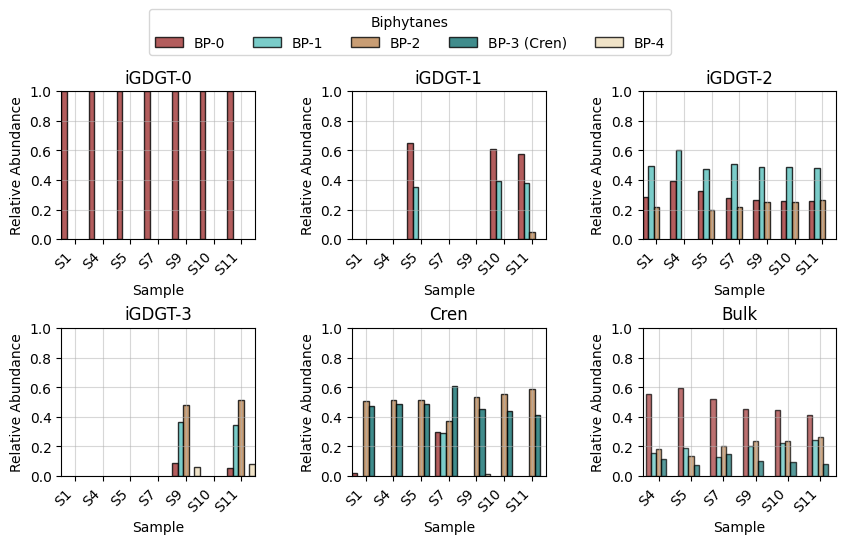

In [116]:
#Figure 1
fig, ax = plt.subplots(2, 3, figsize=(10, 5))
ax = ax.flatten()

x_axis_samples = ['S1', 'S4', 'S5', 'S7', 'S9', 'S10', 'S11']

# Create bar plots for each GDGT
for i, gdgt in enumerate(unique_gdgts):
    filtered_data = df_sep_rel_abund[df_sep_rel_abund['gdgt'] == gdgt]
    
    sns.barplot(
        data=filtered_data,
        x='sample',
        y='rel_abundance',
        hue='biphytane',
        palette=bp_colors,
        dodge=True,  # Side-by-side bars
        edgecolor='k',
        errorbar = None,
        width=1,
        alpha=0.8,
        ax=ax[i]
    )
    

    ax[i].set_ylim(0, 1.0)
    ax[i].grid(True, alpha=0.5)
    ax[i].set_xticks(range(len(x_axis_samples)))
    ax[i].set_xticklabels(x_axis_samples, rotation=45, ha='right')
    ax[i].set_ylabel('Relative Abundance')
    ax[i].set_xlabel('Sample')
    
    # Adjust legend position for the first subplot only (example adjustment)
    if i == 0:
        ax[i].legend(
            loc='upper center',  # Place legend in the upper-right corner
            bbox_to_anchor=(1.8, 1.6),  # Slightly outside the plot area
            title="Biphytanes", ncol=5
        )
    else:
        ax[i].legend().remove()  # Remove legends from other subplots


gdgts = [ 'iGDGT-0','iGDGT-1','iGDGT-2','iGDGT-3','Cren','Bulk']
for n, m in enumerate(gdgts):
    ax[n].set_title(f'{m}')

# Add bar plot for bulk abundance data to the last subplot
sns.barplot(
    data=df_bulk_abund,
    x='sample',
    y='rel_abundance_fid',
    hue='biphytane',
    palette=bp_colors,
    dodge=True,
    # ci = None,
    edgecolor='k',
    alpha=0.7,
    ax=ax[5], legend = False,
)



x_axis_samples_bulk = ['S4', 'S5', 'S7', 'S9', 'S10', 'S11']
ax[5].set_xticks(range(len(x_axis_samples_bulk)))
ax[5].set_xticklabels(x_axis_samples_bulk, rotation=45, ha='right')
ax[5].set_ylabel('Relative Abundance')
ax[5].set_xlabel('Sample')
ax[5].grid('on', alpha=0.5)
ax[5].set_ylim([0,1])


plt.subplots_adjust(wspace=0.5, hspace=0.6) 
plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.savefig('../Figures/Fig1.png',bbox_inches='tight',dpi = 400)



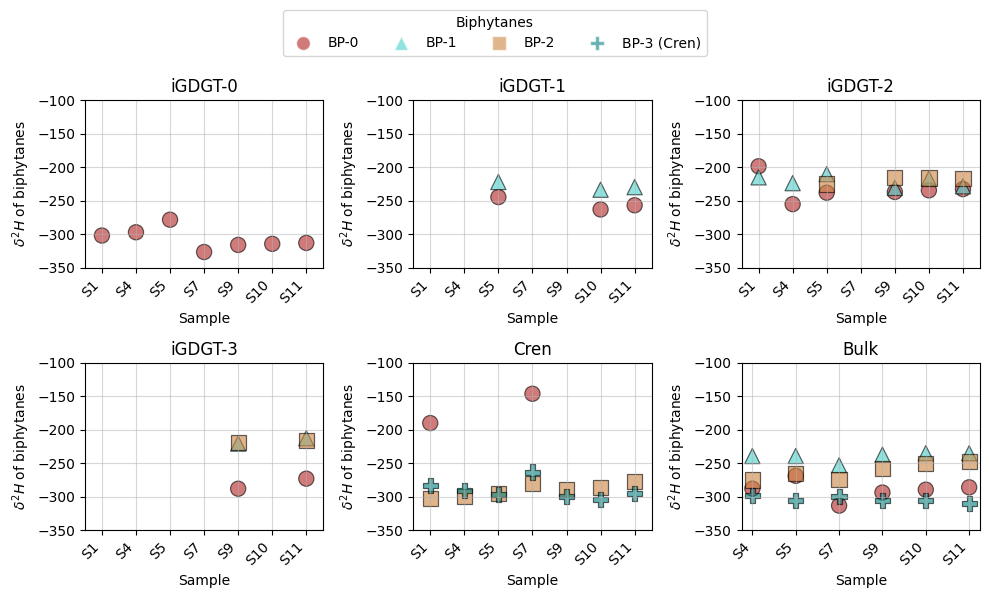

In [128]:
#Figure 2
fig, ax = plt.subplots(2,3, figsize=(10, 6))
ax = ax.flatten()
unique_bps = df['biphytane'].dropna().unique()

# Manually specify the samples to include on the x-axis
x_axis_samples = ['S1', 'S4', 'S5', 'S7', 'S9', 'S10', 'S11']

marker_alpha = 0.6

# Iterate over each GDGT to create individual subplots
for i, gdgt in enumerate(unique_gdgts):
    filtered_data = df[df['gdgt'] == gdgt]
    
    for biphytane in unique_bps:
        filtered_data_bp = filtered_data[filtered_data['biphytane'] == biphytane]
        if not filtered_data_bp.empty:
            sns.scatterplot(
                data=filtered_data_bp,
                x='sample',
                y='corrected_d2H.permil',
                hue='biphytane',
                style='biphytane',
                palette=bp_colors,
                markers=bp_markers,
                edgecolor='k',
                ax=ax[i],
                legend=False,  
                alpha=marker_alpha,  
                s=120
            )
    
    # Set x-axis ticks and labels
    ax[i].set_xticks(range(len(x_axis_samples)))
    ax[i].set_xticklabels(x_axis_samples, rotation=45, ha='right')
    
    # Adjust layout and plot settings
    ax[i].set_xlim(-0.5, len(x_axis_samples) - 0.5)
    ax[i].set_ylim([-350, -100])
    ax[i].grid(True, alpha=0.5)
    ax[i].set_ylabel(r'$\delta^{2}H$ of biphytanes')
    ax[i].set_xlabel('Sample')


handles, labels = [], []
for biphytane in unique_bps:
    marker = bp_markers[biphytane]
    handles.append(
        plt.Line2D(
            [0], [0],
            marker=marker,
            color='w',
            markerfacecolor=bp_colors[biphytane],
            markersize=10,
            label=biphytane,
            alpha=marker_alpha  
        )
    )
fig.legend(
    handles=handles,
    loc='upper center',
    ncol=5,
    bbox_to_anchor=(0.5, 1.0),
    title="Biphytanes",
    fontsize=10
)
sns.scatterplot(data = df_bulk_isotopes, 
    x='sample', 
    y='corrected_d2H.permil', 
    hue = 'biphytane',
    style='biphytane',
    palette=bp_colors,
    markers=bp_markers,
    edgecolor='k',
    ax=ax[5],
    legend=False,  # Disable individual legends
    alpha=marker_alpha,  # Set consistent alpha
    s=120)

#bulk subplot
x_axis_samples_bulk = ['S4', 'S5', 'S7', 'S9', 'S10', 'S11']
ax[5].set_xticks(range(len(x_axis_samples_bulk)))
ax[5].set_xticklabels(x_axis_samples_bulk, rotation=45, ha='right')
ax[5].set_ylabel(r'$\delta^{2}H$ of biphytanes')
ax[5].set_xlabel('Sample')
ax[5].set_ylim([-350,-100])
ax[5].grid('on',alpha=0.5)
ax[5].set_xlabel('Sample')

gdgts = [ 'iGDGT-0','iGDGT-1','iGDGT-2','iGDGT-3','Cren','Bulk']
for n, m in enumerate(gdgts):
    ax[n].set_title(f'{m}')

#shared legend
plt.tight_layout(rect=[0, 0, 1, 0.9])  # Add extra space at the top for the legend
plt.savefig('../Figures/Fig2.png', bbox_inches='tight',dpi = 400)



In [129]:
#aggregate data for figure 3
#specifiy gdgt order
gdgt_order = ['Cren', 'G0', 'G1', 'G2', 'G3']
aggregated_data = df.groupby(['sample', 'gdgt']).agg({
    'd13C': 'first',  # Keep the first d13C value for each GDGT in a sample
    'corrected_d2H.permil': 'mean',  # Average d2H values of biphytanes for each gdgt in a sample
    'distance_from_plume': 'mean'  # distance is same for each biphytane for each gdgt in sample 
}).reset_index()

# Convert the GDGT column to a categorical type with the specified order
aggregated_data['gdgt'] = pd.Categorical(
    aggregated_data['gdgt'], 
    categories=gdgt_order, 
    ordered=True
)

aggregated_data = aggregated_data.sort_values('gdgt').reset_index(drop=True)
aggregated_data =  aggregated_data.dropna()

print(aggregated_data)



   sample  gdgt   d13C  corrected_d2H.permil  distance_from_plume
0     S11  Cren -36.55           -286.165104                  0.0
1     S10  Cren -31.55           -295.472169                  0.0
2      S1  Cren -22.70           -258.738321                 20.0
3      S9  Cren -26.16           -294.103370                  0.0
4      S7  Cren -23.01           -186.028228                  0.0
5      S4  Cren -23.87           -295.021533                 20.0
6      S5  Cren -25.92           -296.065904                 20.0
7     S11    G0 -35.78           -313.170713                  0.0
8     S10    G0 -35.05           -314.531671                  0.0
9      S9    G0 -34.27           -316.126675                  0.0
10     S7    G0 -23.01           -326.730342                  0.0
11     S1    G0 -30.91           -302.067513                 20.0
12     S5    G0 -63.31           -278.438865                 20.0
13     S4    G0 -48.29           -297.179126                 20.0
14    S11 

/var/folders/13/217c9md10ldcbnl1vbd8_hnr0000gn/T/ipykernel_33866/613210685.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_data = df.groupby(['sample', 'gdgt']).agg({


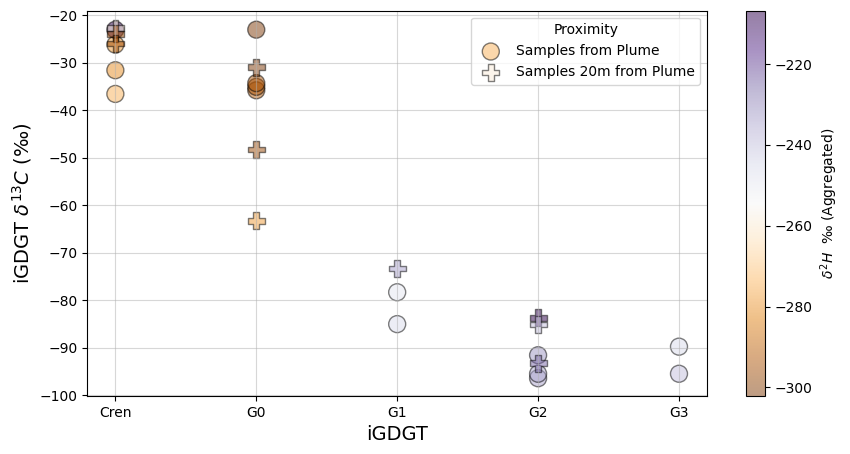

In [130]:
#Figure 3
close_df = aggregated_data[aggregated_data['distance_from_plume']==0]
far_from_plume= aggregated_data[aggregated_data['distance_from_plume']==20]

plt.figure(figsize=(10, 5))

# Plot "Close to Plume" samples
plt.scatter(
    x=close_df['gdgt'],
    y=close_df['d13C'],
    c=close_df['corrected_d2H.permil'],
    cmap='PuOr',
    s=150,
    edgecolor='k',
    alpha=0.5,
    label='Samples from Plume'
)

# Plot "Far from Plume" samples
plt.scatter(
    x=far_from_plume['gdgt'],
    y=far_from_plume['d13C'],
    c=far_from_plume['corrected_d2H.permil'],
    cmap='PuOr',
    marker = 'P',
    s=150,
    edgecolor='k',
    alpha=0.5,
    label='Samples 20m from Plume'
)


plt.colorbar(label=r'$\delta^2H$  ‰ (Aggregated)')
plt.xlabel('iGDGT', fontsize = 14)
plt.ylabel(r'iGDGT $\delta^{13}C$ (‰)', fontsize = 14)
plt.legend(title='Proximity')
plt.grid(alpha=0.5)
plt.savefig('../Figures/d13c_vs_d2h.png',dpi = 400)



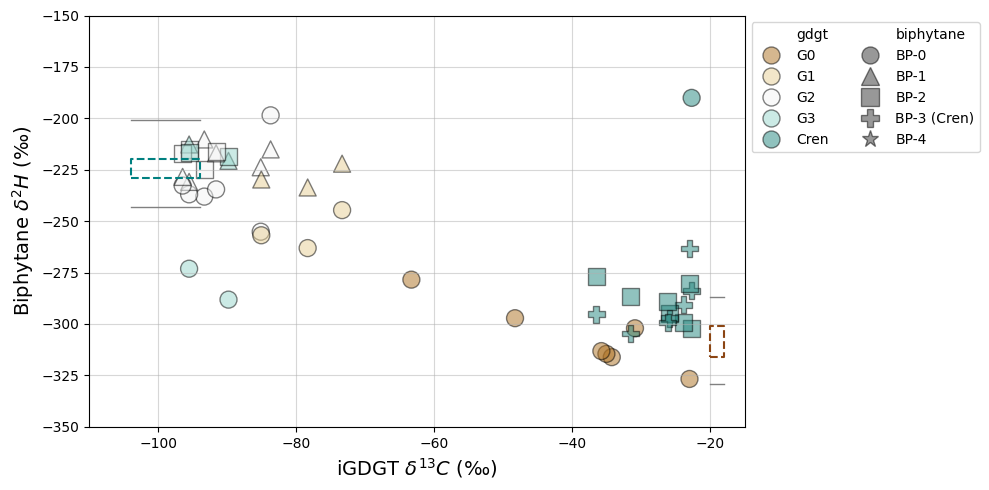

In [136]:
#Figure 5
fig,ax = plt.subplots(figsize=(10,5))
sns.scatterplot(data = df, x = 'd13C', y ='corrected_d2H.permil',
    palette = 'BrBG',
    s=150,  
    edgecolor = 'k',
    alpha = 0.5,
    hue ='gdgt', 
    style ='biphytane', 
    markers = bp_markers)
plt.legend(bbox_to_anchor=(1,1), ncol =2)
plt.grid('on',alpha =.5)
plt.xlim([-110,-15])
plt.ylim([-350,-150])

## plot the box

# Define the coordinates of the square (corners in clockwise order)
x = [-104, -94, -94, -104, -104]  
y = [-229, -229, -220, -220, -229] 

# # Plot the square
plt.plot(x, y, color='teal', linestyle = '--')  

x2 = [-20, -18, -18, -20, -20]  
y2 = [-316, -316, -301, -301, -316]  


plt.plot(x2, y2, color='saddlebrown', linestyle = '--') 

y1_s = -201  # y-coordinate for the horizontal line
x_start = -104  # Starting x-coordinate
x_end = -94  # Ending x-coordinate
y2_s =  -243# Ending y-coordinate


plt.plot([x_start, x_end], [y1_s, y1_s], color='gray', linewidth=1) 
plt.plot([x_start, x_end], [y2_s, y2_s], color='gray', linewidth=1) 

y1_p = -287  # y-coordinate for the horizontal line
x_start = -18  # Starting x-coordinate
x_end = -20  # Ending x-coordinate
y2_p =  -329 #ending y-coordinate


plt.plot([x_start, x_end], [y1_p, y1_p], color='gray', linewidth=1) 
plt.plot([x_start, x_end], [y2_p, y2_p], color='gray', linewidth=1) 
plt.xlabel(r'iGDGT $\delta^{13}C$ (‰)', fontsize =14)
plt.ylabel(r'Biphytane $\delta^{2}H$ (‰)', fontsize = 14)
plt.tight_layout()

# plt.vlines(x=-98, ymin=-229, ymax=-215, color='red', linestyle='--', linewidth=2)
plt.savefig('../Figures/Fig5.png',dpi = 400)